In [8]:
from autoviz.AutoViz_Class import AutoViz_Class

## autoviz kütüphanesi ile özellikler arasındaki ilişkiler otomatik bir şekilde görselleştirilebiliyor.
## Bu sayede analiz kısa sürede birçok grafik üzerinden yapılmış oluyor.

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("insurance.csv")

In [5]:
data = pd.read_csv("insurance.csv") ## ilerleyen yerlerde ilk haliyle kıyaslayabilmek için yedek df

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.drop(columns="region",inplace = True)

In [15]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


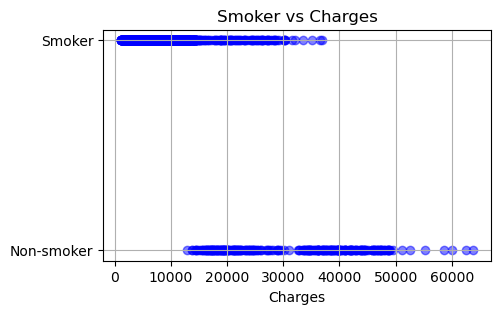

In [17]:
x = df["charges"]
y = df["smoker"]
plt.figure(figsize=(5, 3))
plt.scatter(x, y, color='blue', alpha=0.5)
plt.title("Smoker vs Charges")
plt.xlabel("Charges")
plt.yticks([0, 1], labels=["Non-smoker", "Smoker"])
plt.grid(True)
plt.show()

## sigara içenler ile sigorta bedellerinin incelenmesi

Shape of your Data Set loaded: (1338, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    5 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression problem #####################
To fix these data quality issues in 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,int64,0.000000,3,18.000000,64.000000,No issue
sex,int32,0.000000,0,0.000000,1.000000,No issue
bmi,float64,0.000000,NA,15.960000,53.130000,Column has 9 outliers greater than upper bound (47.32) or lower than lower bound(13.67). Cap them or remove them.
children,int64,0.000000,0,0.000000,5.000000,No issue
smoker,int32,0.000000,0,0.000000,1.000000,No issue
charges,float64,0.000000,100,1121.873900,63770.428010,Target column


Using Lowess Smoothing. This might take a few minutes for large data sets...


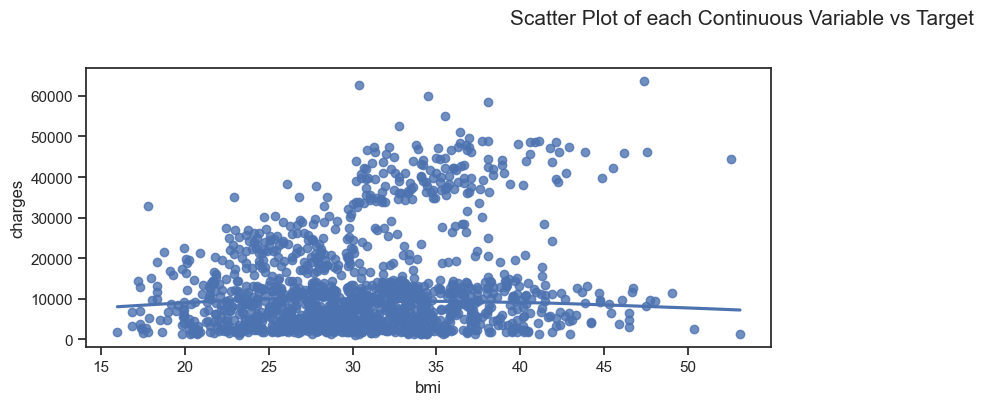

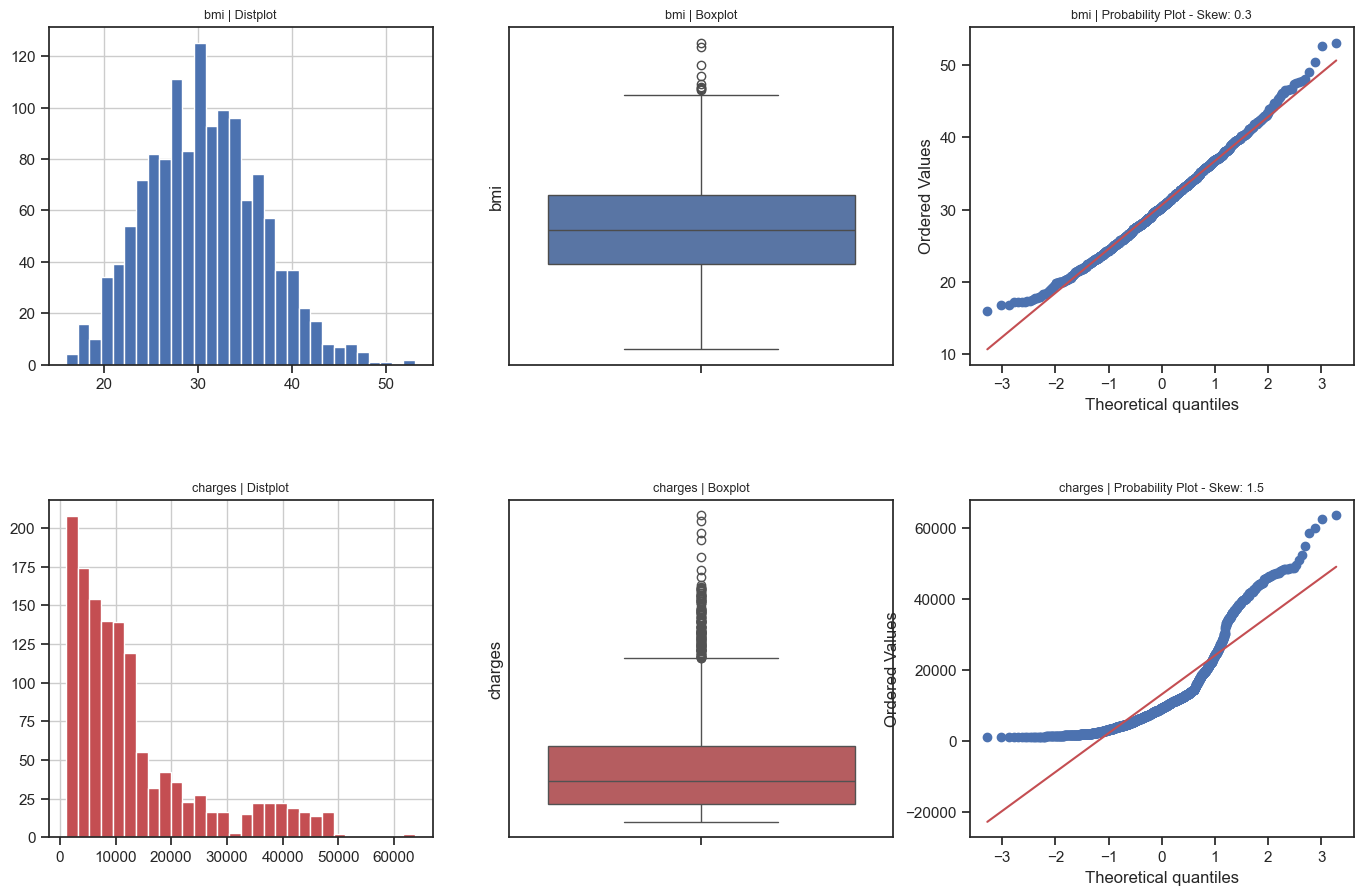

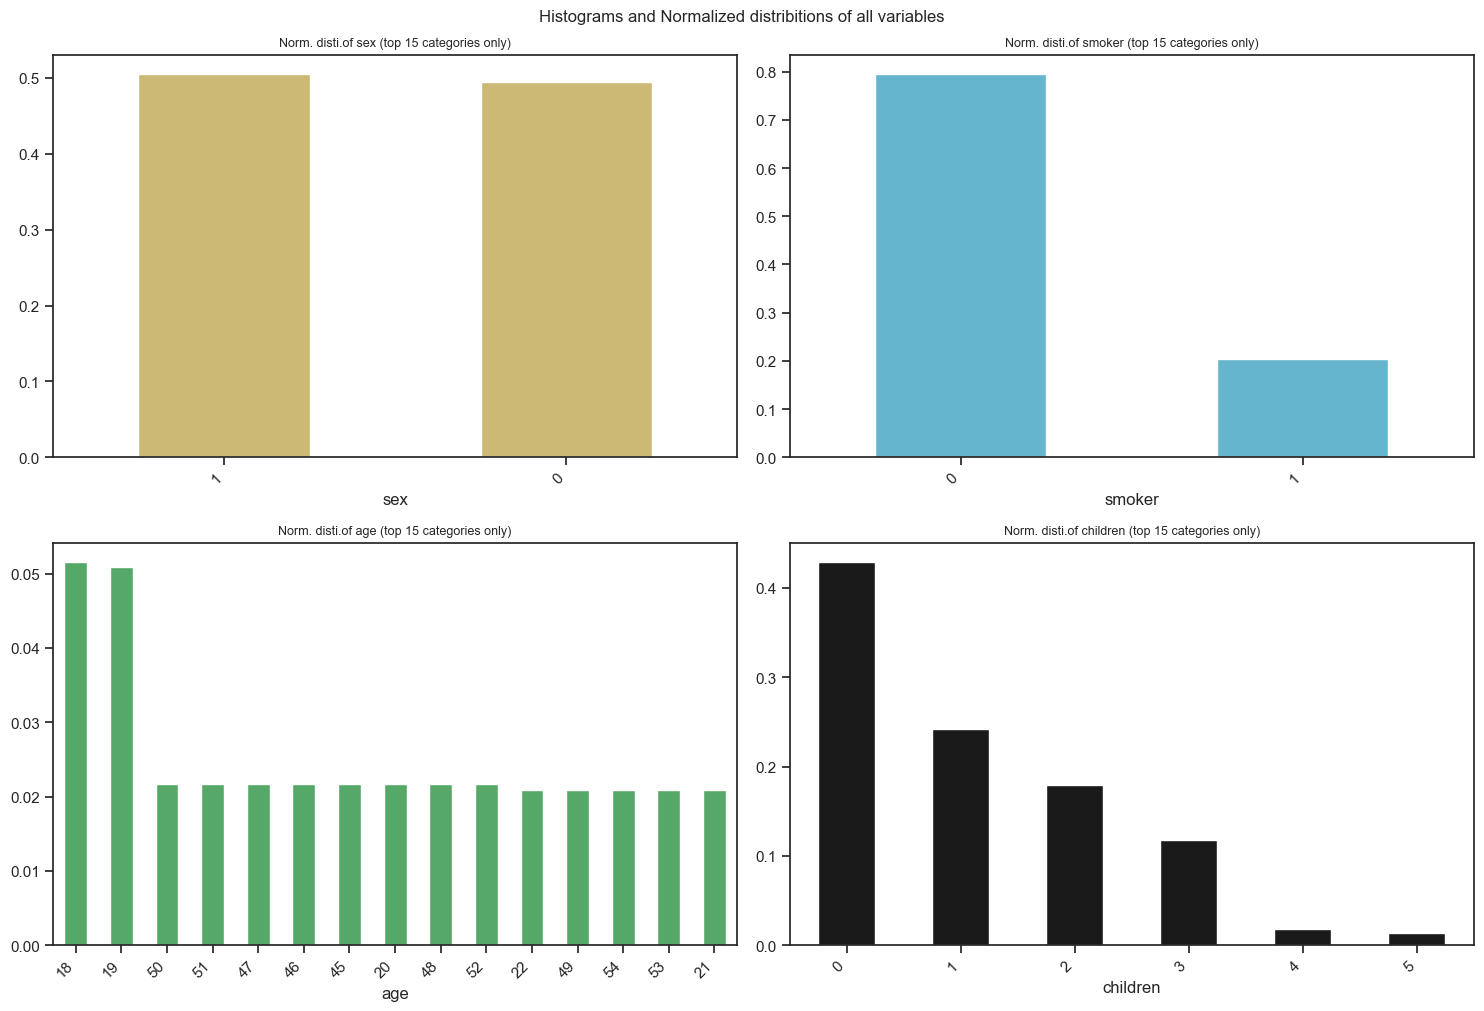

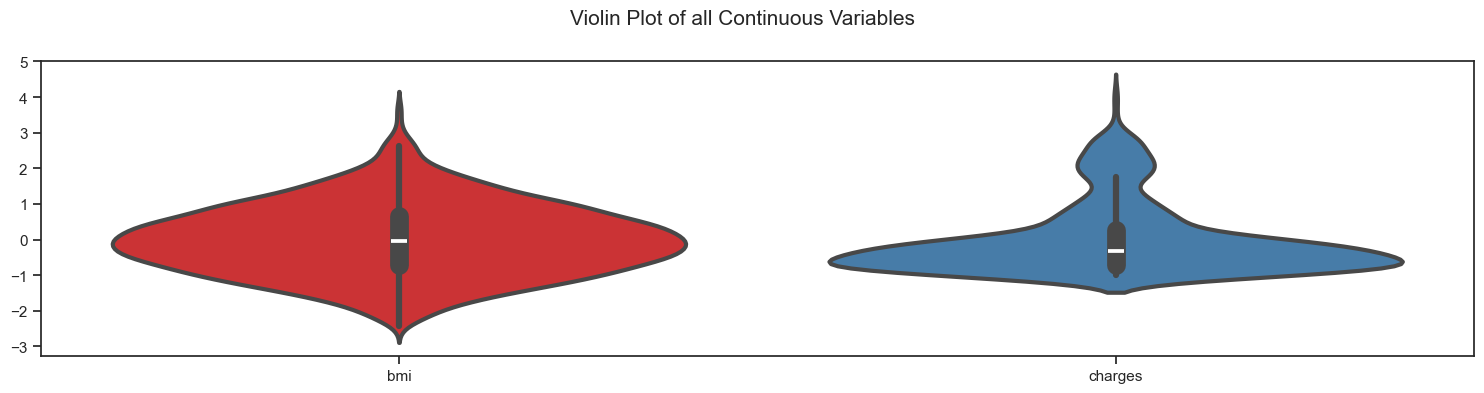

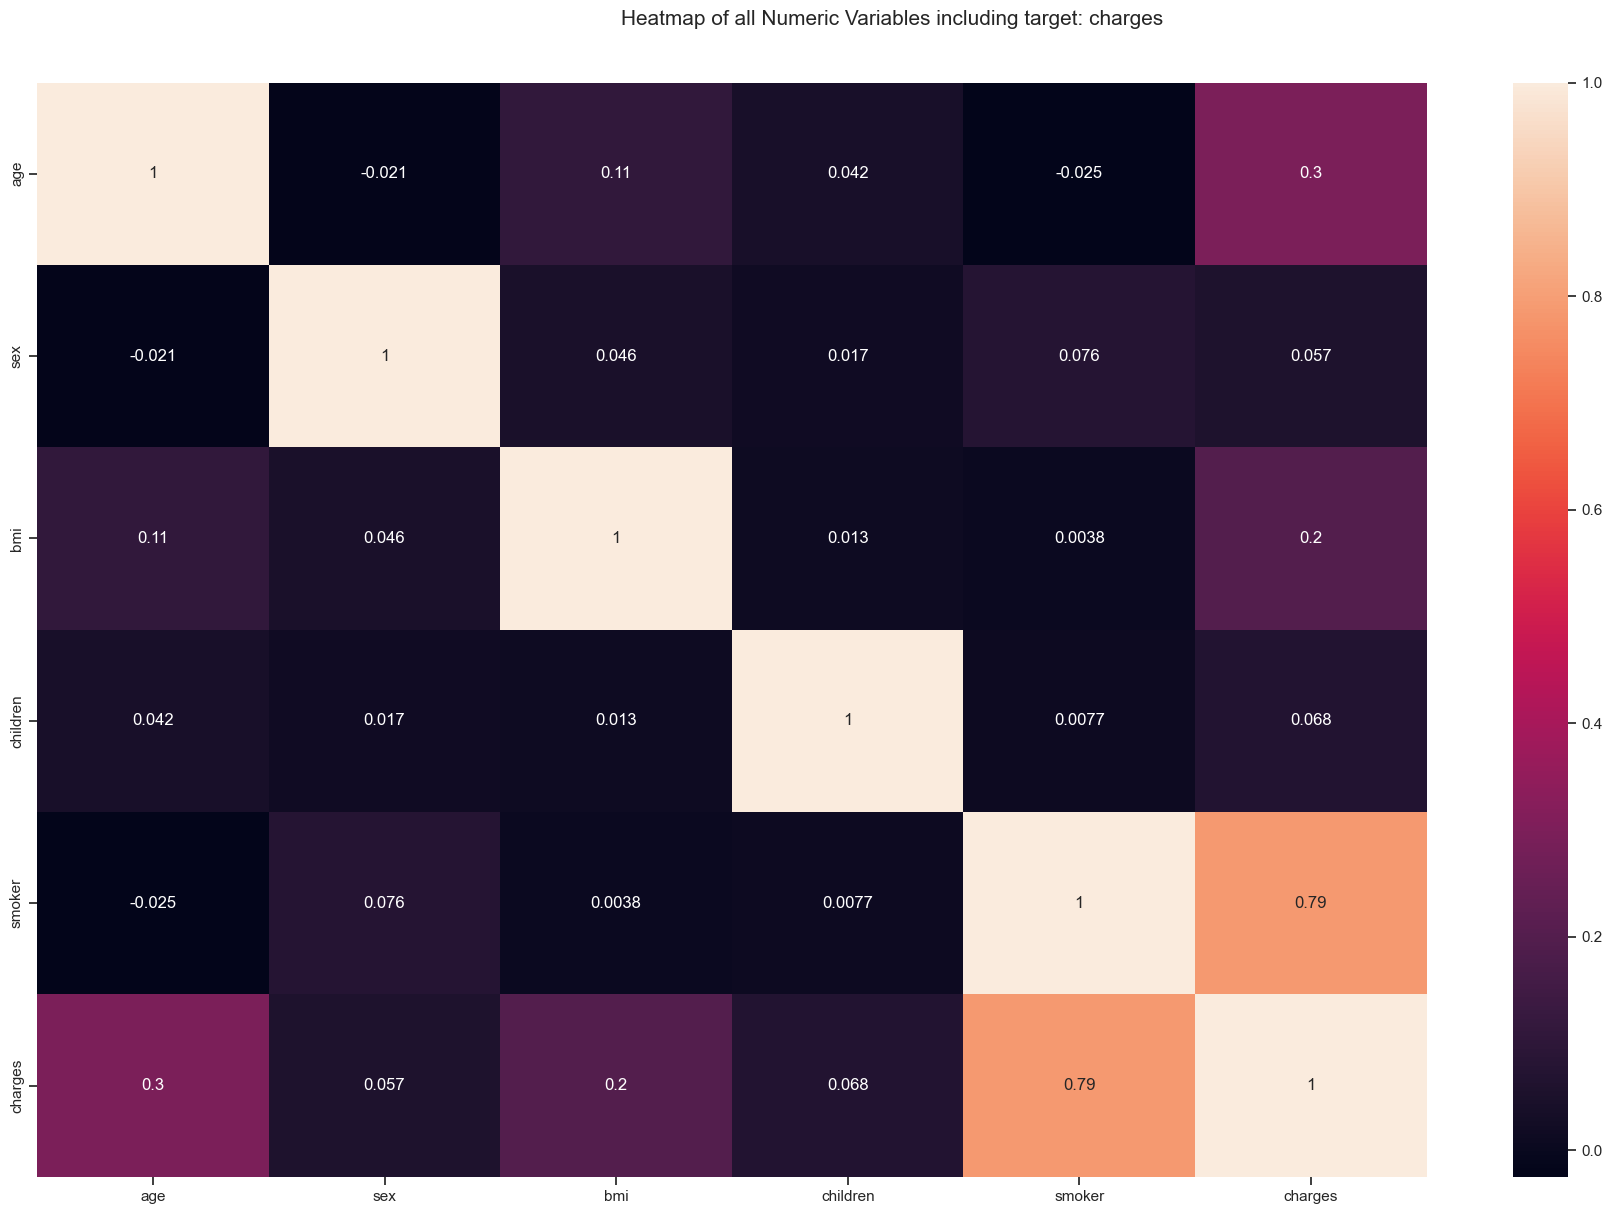

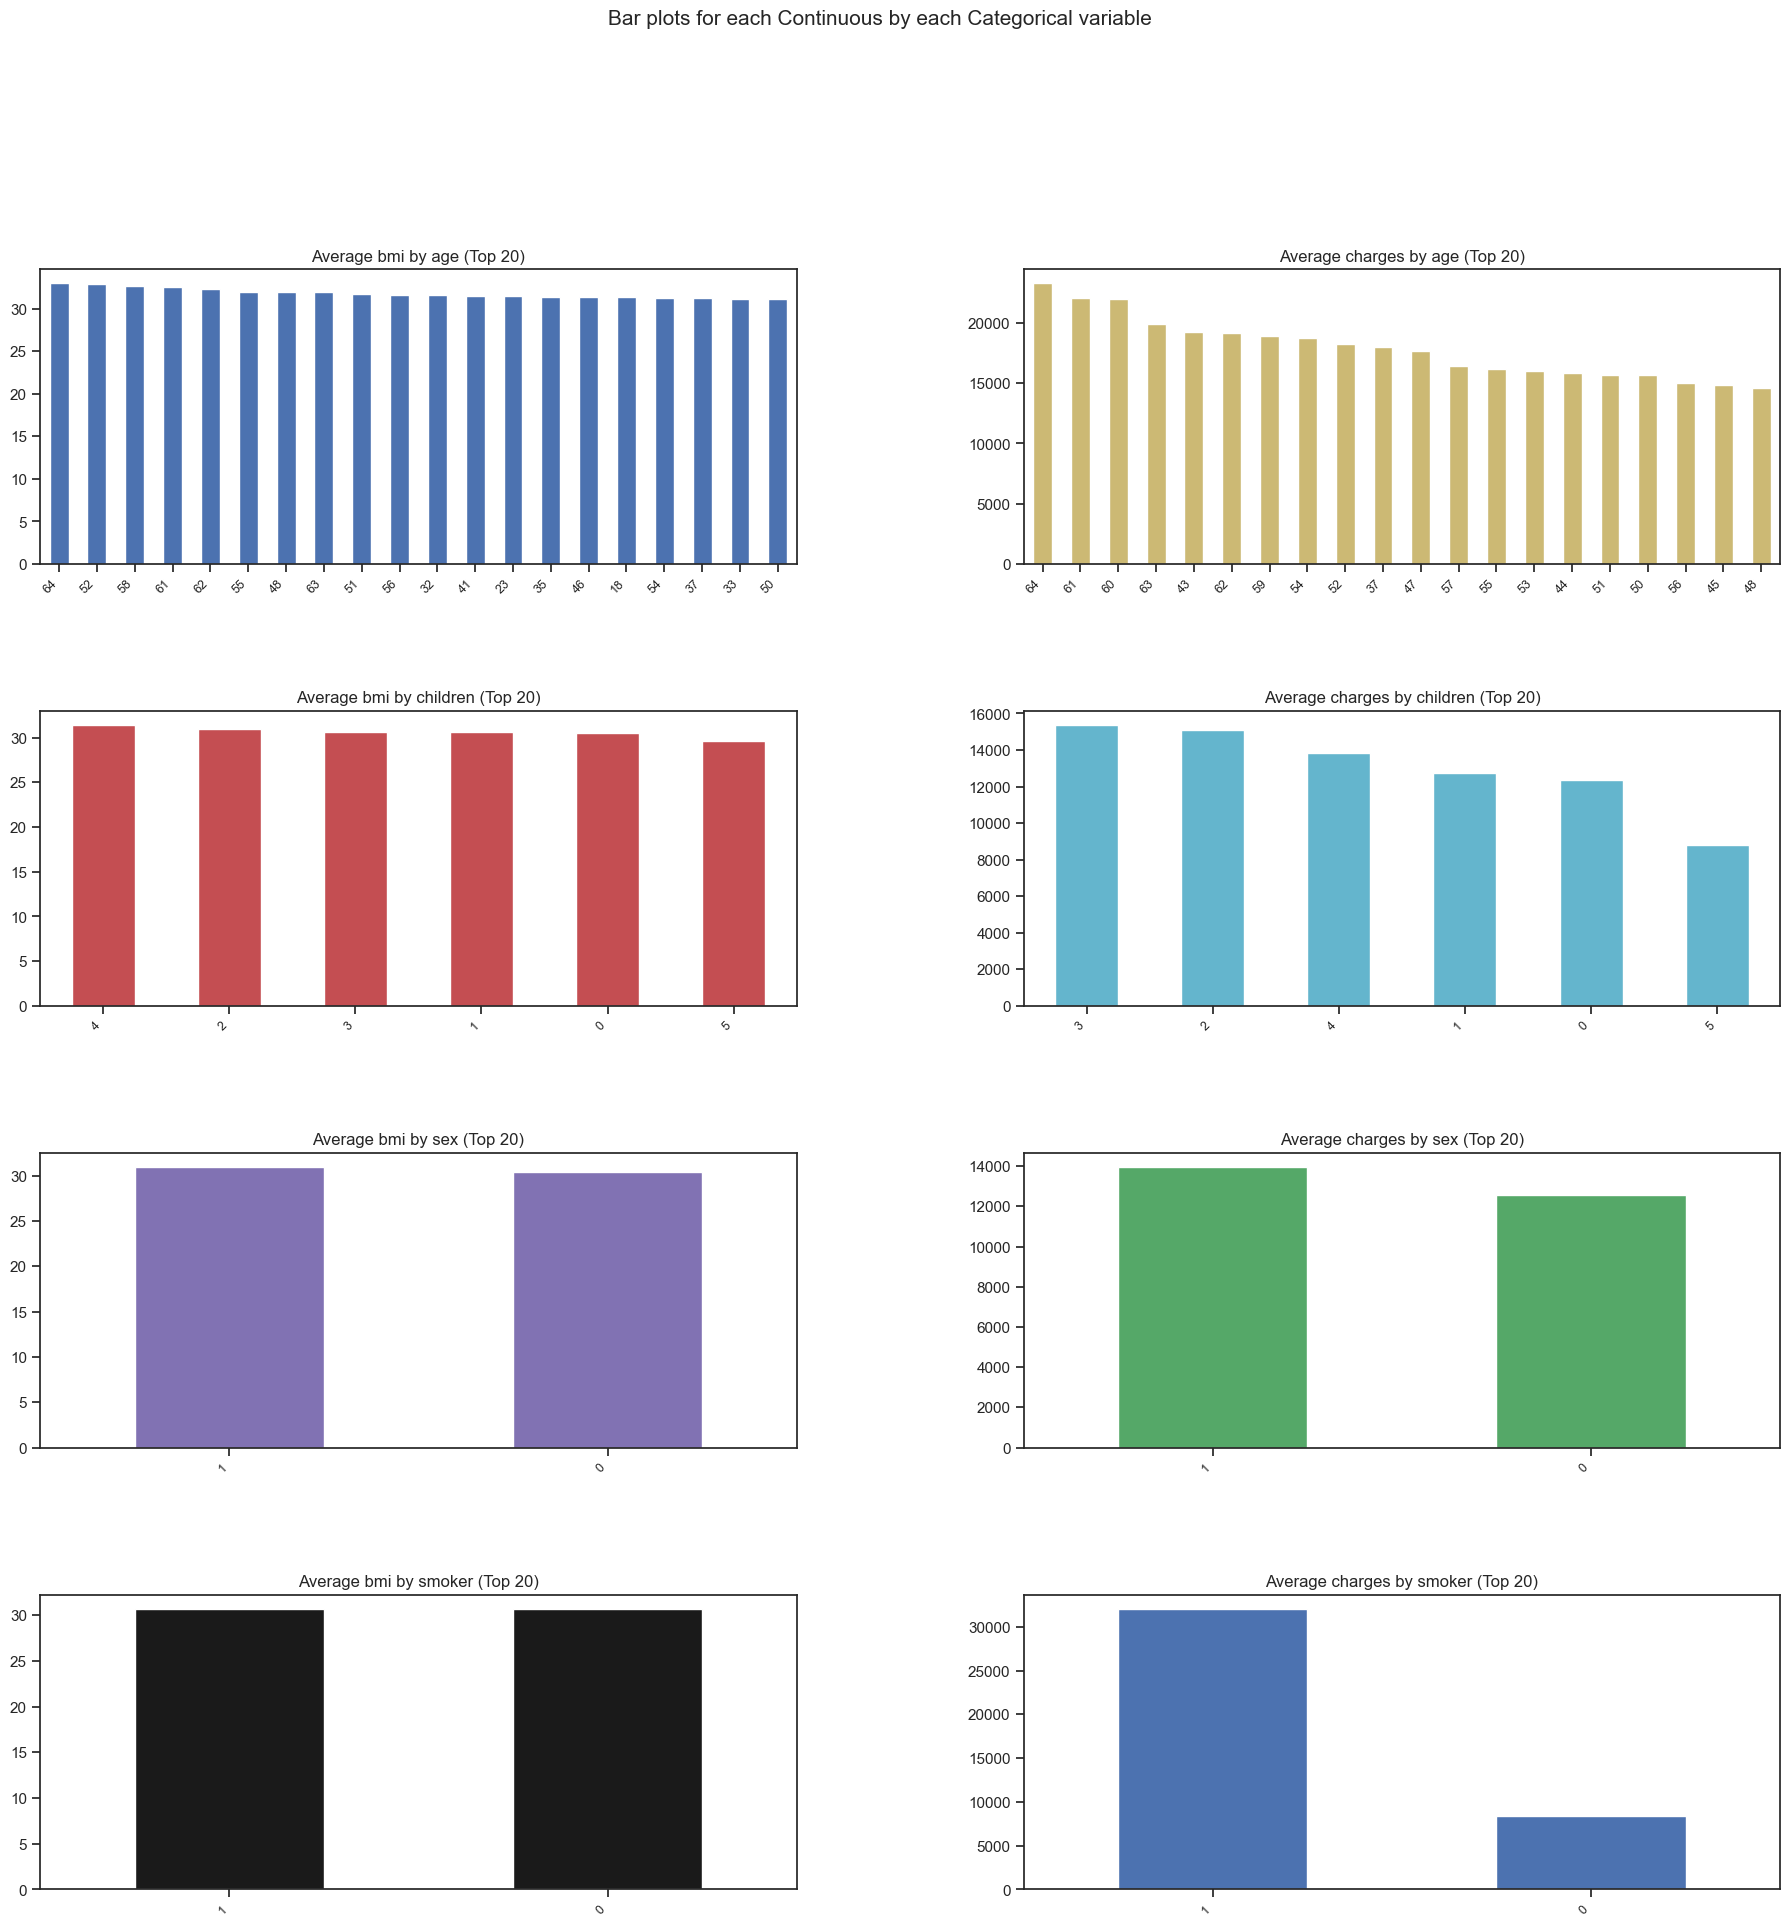

All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [107]:
AV = AutoViz_Class()
dft = AV.AutoViz(
    "",
    sep=",",
    depVar="charges",
    dfte=df,
    header=0,
    verbose=1,
    lowess=True,
    chart_format="svg",
    max_rows_analyzed=1500,
    max_cols_analyzed=10,
    save_plot_dir=None
)

In [21]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


### Outliers

In [24]:
df.shape

(1338, 6)

In [26]:
## aykırı değerler 68-95-99.7 kuralı ile bulunup veri setinden kaldırıldı.
for column in df.columns[2:-2]:
    selected_column = df[column]

    std = selected_column.std()
    avg = selected_column.mean()

    three_sigma_plus = avg + (3 * std)
    three_sigma_minus = avg - (3 * std)

    outliers = selected_column[(selected_column > three_sigma_plus) | (selected_column < three_sigma_minus)].index
    print(f"Aykırı değerler {column} sütunu için: {outliers}")
    df.drop(index=outliers, inplace=True)

df.reset_index

Aykırı değerler bmi sütunu için: Index([116, 847, 1047, 1317], dtype='int64')
Aykırı değerler children sütunu için: Index([  32,   71,  166,  413,  425,  438,  568,  640,  877,  932,  937,  969,
        984, 1085, 1116, 1130, 1245, 1272],
      dtype='int64')


<bound method DataFrame.reset_index of       age     sex     bmi  children smoker      charges
0      19  female  27.900         0    yes  16884.92400
1      18    male  33.770         1     no   1725.55230
2      28    male  33.000         3     no   4449.46200
3      33    male  22.705         0     no  21984.47061
4      32    male  28.880         0     no   3866.85520
...   ...     ...     ...       ...    ...          ...
1333   50    male  30.970         3     no  10600.54830
1334   18  female  31.920         0     no   2205.98080
1335   18  female  36.850         0     no   1629.83350
1336   21  female  25.800         0     no   2007.94500
1337   61  female  29.070         0    yes  29141.36030

[1316 rows x 6 columns]>

In [28]:
df.shape ## 22 değer silinmiş 1338->1316

(1316, 6)

### Eğitim

In [31]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [35]:
X = df.drop(columns="charges")
Y = df["charges"]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### normalizasyon - standardizasyon

In [40]:
print("Test\n",x_test.head())
print("Train\n",x_train.head())

Test
      age     sex     bmi  children smoker
202   60  female  24.035         0     no
565   19  female  30.495         0     no
375   23  female  28.310         0    yes
293   22  female  28.820         0     no
188   41  female  32.200         1     no
Train
      age     sex     bmi  children smoker
316   50    male  32.205         0     no
143   29    male  29.735         2     no
917   45    male  22.895         0    yes
371   57  female  22.230         0     no
203   27  female  36.080         0    yes


In [42]:
le = LabelEncoder()
x_train["smoker"] = le.fit_transform(x_train["smoker"])
x_test["smoker"] = le.transform(x_test["smoker"])
x_train["sex"] = le.fit_transform(x_train["sex"])
x_test["sex"] = le.transform(x_test["sex"])
## OneHotEncoder kullanılması daha iyi olabilirdi. Lineer regresyon gibi modeller için hiyerarşi olmayan encode yöntemlerinin kullanılması 
## daha sağlıklı olur.

In [44]:
print("Test\n",x_test.head())
print("Train\n",x_train.head())

Test
      age  sex     bmi  children  smoker
202   60    0  24.035         0       0
565   19    0  30.495         0       0
375   23    0  28.310         0       1
293   22    0  28.820         0       0
188   41    0  32.200         1       0
Train
      age  sex     bmi  children  smoker
316   50    1  32.205         0       0
143   29    1  29.735         2       0
917   45    1  22.895         0       1
371   57    0  22.230         0       0
203   27    0  36.080         0       1


In [46]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [48]:
reg_model = LinearRegression().fit(x_train_scaled,y_train)

In [50]:
train_score = reg_model.score(x_train_scaled,y_train)
train_score

0.7417468862626043

In [52]:
reg_coef = reg_model.coef_
reg_coef

array([3513.598153  , -193.90079439, 1955.49662288,  634.46103599,
       9604.44035367])

In [54]:
reg_inter = reg_model.intercept_
reg_inter

13262.111190113119

y' = coef * x' + intercept

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [104]:
pred = reg_model.predict(x_test_scaled)
mean_abs = mean_absolute_error(y_test,pred)
r_mean_sq = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test, pred)
print(f"mae : {mean_abs}")
print(f"rmse : {r_mean_sq}")
print(f"r2 score : {r2}")

## r2 test veri seti

mae : 4124.266374794723
rmse : 5868.5754315415725
r2 score : 0.7799944554394997


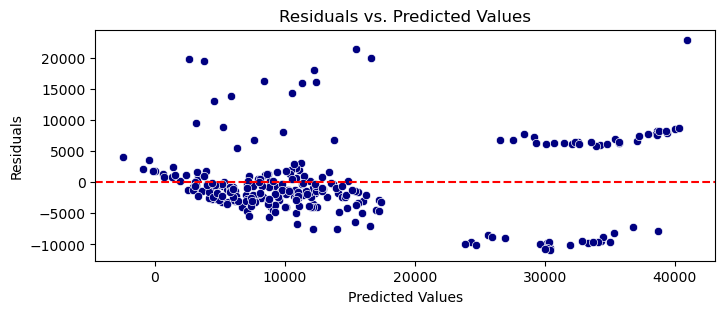

In [100]:
residuals = y_test - pred
plt.figure(figsize=(8, 3))
sbn.scatterplot(x=pred, y=residuals, color='navy')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.savefig('residuals_preds', dpi=400)
plt.show()


### rezidü --> gerçek değer ile tahmin edilen değer arasındaki farktır. Rezidü == 0 ise doğru tahmin yapılmıştır.
### Bu yüzden aşağıdaki grafikte predicted values, kırmızı çizgiye (0'a) ne kadar yakında o kadar iyi tahmin yapmış demektir.